In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas_datareader as data

In [2]:
'''
1. plt.style.use('fivethirtyeight')

This applies the FiveThirtyEight (a popular news site) style to your 
Matplotlib plots.
It makes charts more visually appealing with a modern, minimalist look.

2. %matplotlib inline

This is a Jupyter Notebook magic command that ensures plots are displayed 
directly inside the notebook instead of opening in a separate window.
'''

plt.style.use('fivethirtyeight')
%matplotlib inline

In [152]:
# %pip install yfinance

In [3]:
import yfinance as yf
import datetime as dt

stock = 'POWERGRID.NS'
start= dt.datetime(2000,1, 1)
end= dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2024-10-25,307.732239,313.286633,305.247396,313.286633,12979410
2024-10-28,310.168365,312.263463,302.811258,306.465456,9610615
2024-10-29,312.360901,312.994319,306.124408,308.024603,15856332
2024-10-30,310.314575,317.087006,308.657993,310.411997,14498110
2024-10-31,312.604523,314.456007,309.729904,312.214747,9900390


In [5]:
df.shape

(4208, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [7]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255945,80.286305,78.238144,79.292804,1.188963e+07
std,63.621687,64.365265,62.829875,63.603316,2.061999e+07
min,18.908407,20.212435,16.952366,20.114632,0.000000e+00
25%,36.349715,36.923186,35.812881,36.386932,4.799653e+06
50%,55.232321,55.870055,54.493154,55.338364,8.344398e+06
75%,82.704777,83.691960,81.724059,82.727263,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [9]:
df = df.reset_index()

In [10]:
df.shape

(4208, 6)

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.385586,35.250713,26.768006,28.908804,855215656
1,2007-10-08,30.727671,33.480123,30.534515,33.480123,126671715
2,2007-10-09,32.820175,33.109906,29.085854,30.743763,116725709
3,2007-10-10,33.126007,33.802049,32.836276,33.673278,67931378
4,2007-10-11,36.828125,38.630901,32.836267,38.630901,106320954


In [12]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [13]:
df.to_csv("powergrid.csv")

In [14]:
data01=pd.read_csv("powergrid.csv")

In [15]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38558578491211,35.25071281473011,26.768006081918546,28.908803575805525,855215656
2,1,2007-10-08,30.727670669555664,33.480122790770764,30.534515292099577,33.480122790770764,126671715
3,2,2007-10-09,32.82017517089844,33.10990603070133,29.085854182395227,30.743762670622203,116725709
4,3,2007-10-10,33.126007080078125,33.8020487537738,32.83627618174463,33.67327776759036,67931378


In [16]:
# %pip install plotly
# %pip install nbformat


In [17]:
#candlesticks

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                     high = data01['High'],
                                     low = data01['Low'],
                                     close = data01['Close']
                                    )])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [18]:
df=df.drop(['Date'], axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12716\1675480993.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [19]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385586,35.250713,26.768006,28.908804,855215656
1,30.727671,33.480123,30.534515,33.480123,126671715
2,32.820175,33.109906,29.085854,30.743763,116725709
3,33.126007,33.802049,32.836276,33.673278,67931378
4,36.828125,38.630901,32.836267,38.630901,106320954


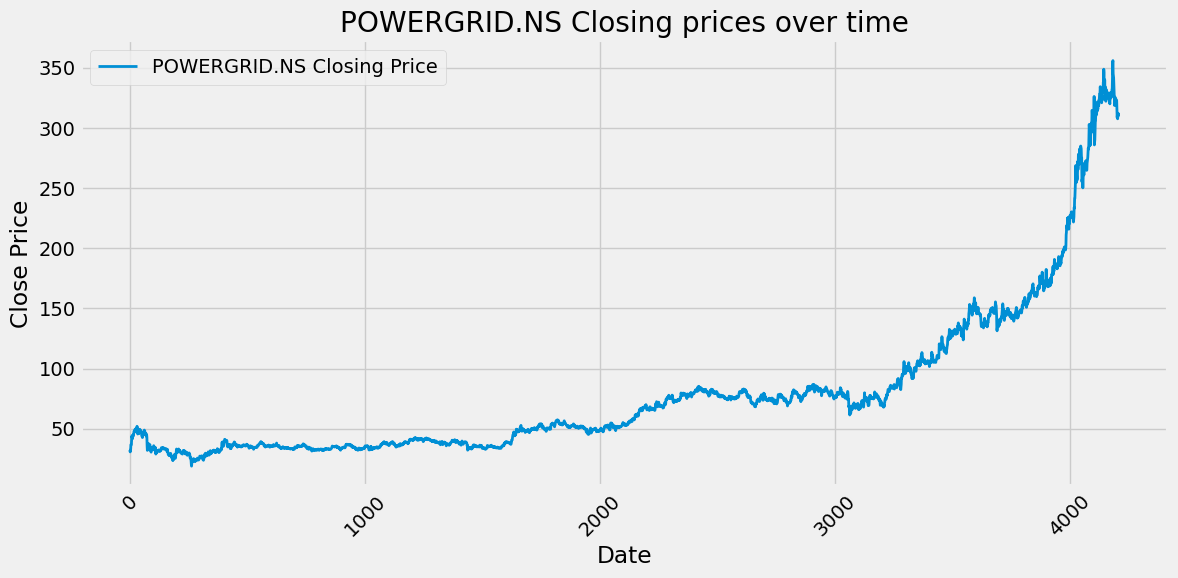

In [20]:
# ...existing code...
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label=f'{stock} Closing Price', linewidth=2)
plt.title(f'{stock} Closing prices over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()       # Adjust layout to prevent label cutoff
plt.show()
# ...existing code...

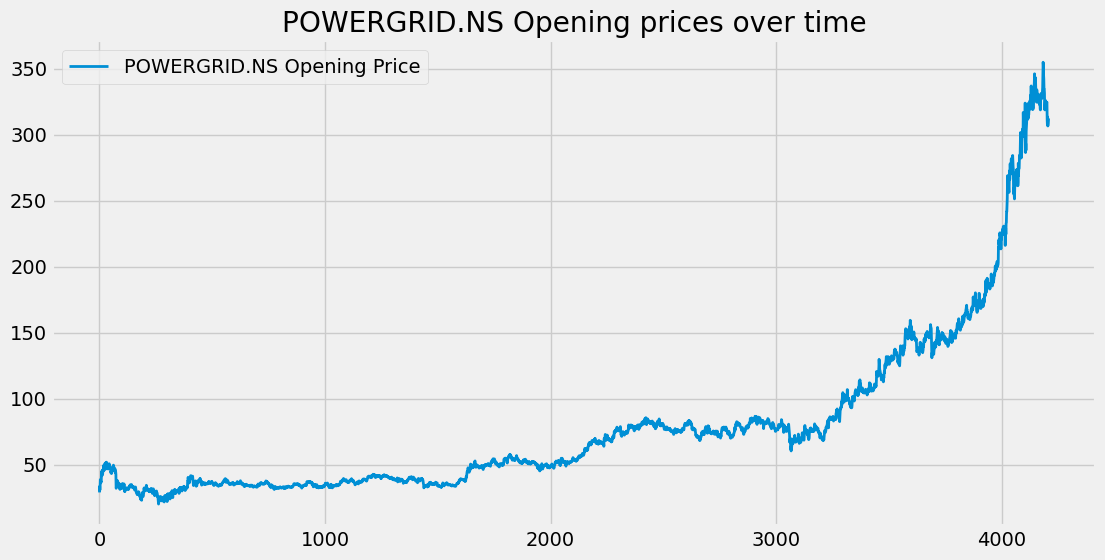

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 2)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()


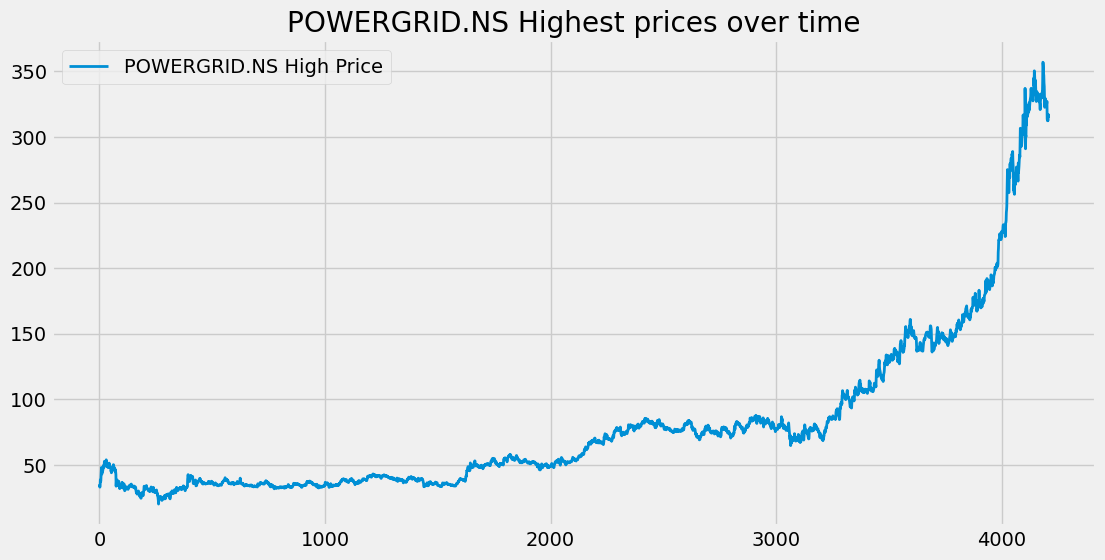

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 2)
plt.title(f'{stock} Highest prices over time')
plt.legend()
plt.show()

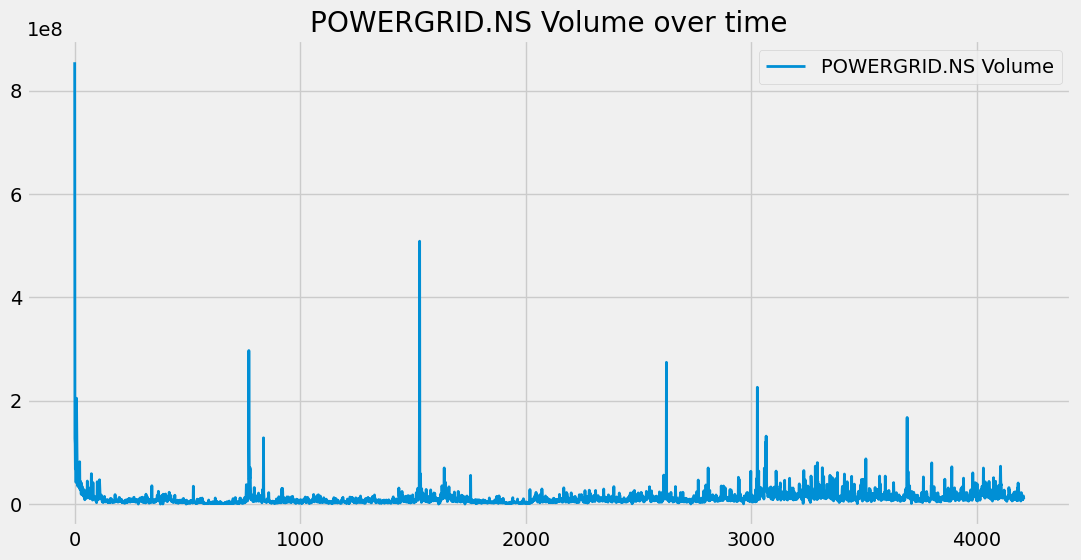

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

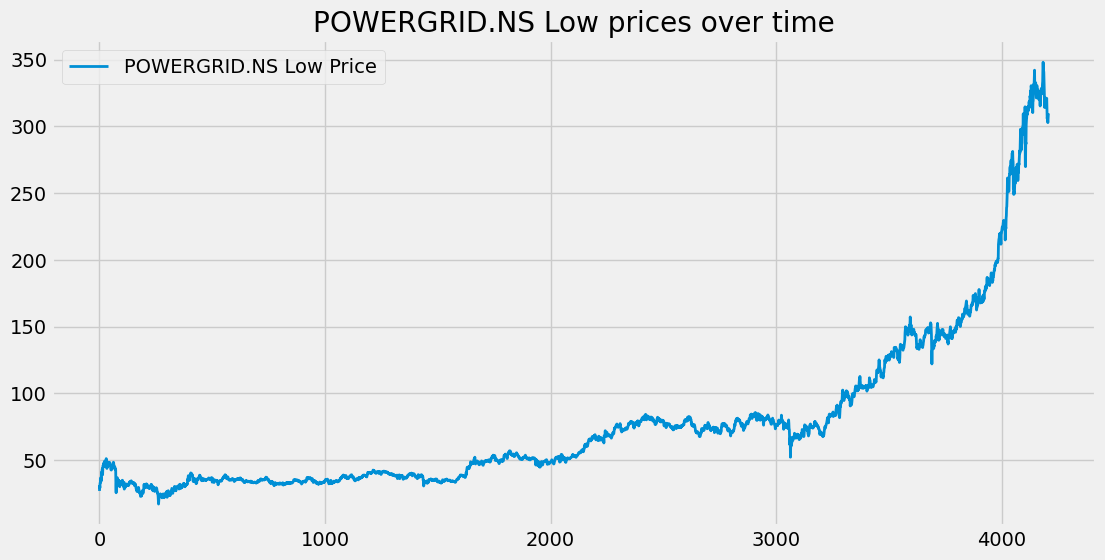

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['Low'], label = f'{stock} Low Price', linewidth = 2)
plt.title(f'{stock} Low prices over time')
plt.legend()
plt.show()

In [176]:
#Techniques - Moving Average= using this you can predict the next day predictions 
#Exponential Moving Average

In [177]:
#moving Average

'''
[10,20,30,40,50,60,70,80,90]
moving average for last 5 days -> null null null null(upto 4th day) 30(5th day)

10+20+30+40+50 / 5  (5th day moving average)
'''

'\n[10,20,30,40,50,60,70,80,90]\nmoving average for last 5 days -> null null null null(upto 4th day) 30(5th day)\n\n10+20+30+40+50 / 5  (5th day moving average)\n'

In [25]:
temp_data = [10,20,30,40,50,60,70,80,90]
print(sum(temp_data[0:5])/5)

30.0


In [26]:
df01=pd.DataFrame(temp_data)
df01

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


In [27]:
df01.rolling(5).mean()
#This is the technique for the moving average

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [28]:
ma100 = df.Close.rolling(100).mean()
ma100 #moving averages for 100 days

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [29]:
ma200=df.Close.rolling(200).mean()
ma200 #moving averages for 200 days

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,297.117669
4204,297.541901
4205,297.956183
4206,298.361184


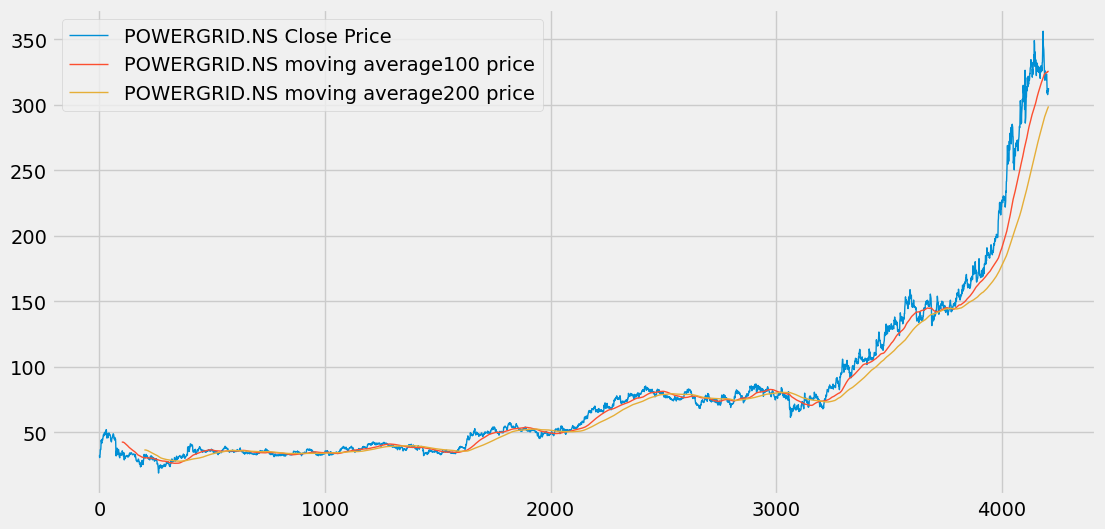

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} moving average100 price', linewidth = 1)
plt.plot(ma200, label = f'{stock} moving average200 price', linewidth = 1)
plt.legend()
plt.show()

In [31]:
ema100 = df.Close.ewm(span=100, adjust=False).mean()

In [32]:
ema200 = df['Close'].ewm(span=200, adjust=False).mean()

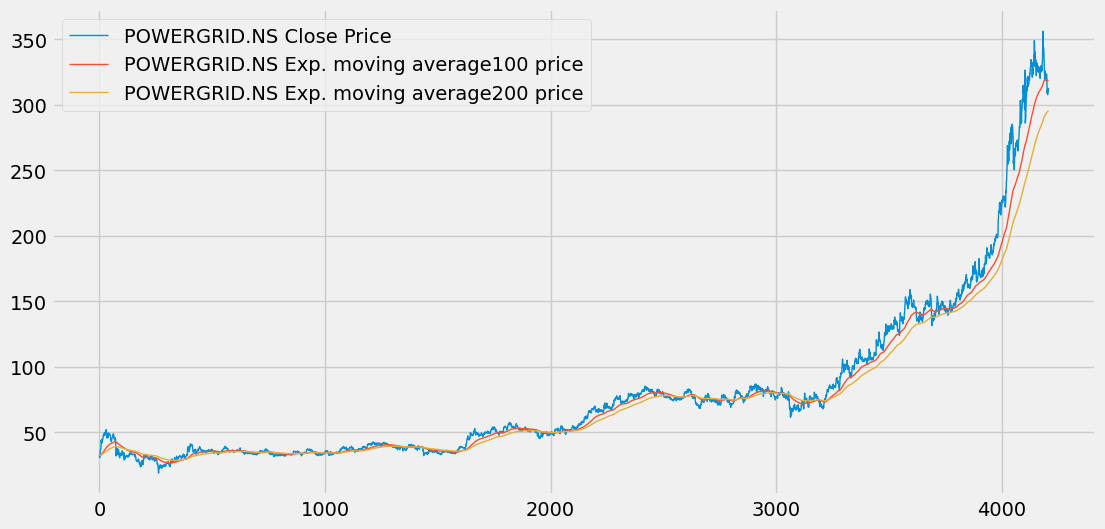

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. moving average100 price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. moving average200 price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
#LSTM - Long Short Term Memory OVER RNN

'''
LSTM can store the data in its memory for a long period of time.
but RNN can't store the data for a long period of time, it can be overflow.
'''

"\nLSTM can store the data in its memory for a long period of time.\nbut RNN can't store the data for a long period of time, it can be overflow.\n"

In [34]:
#now dividing the data into training and testing data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [35]:
data_training.shape, data_testing.shape

((2945, 1), (1263, 1))

In [36]:
#now we need to convert the data that is continuous to one range
#for this purpose now we use min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [37]:
data_training_array = scaler.fit_transform(data_training)

In [38]:
#here all the values are transformed between 0 and 1
data_training_array

array([[0.19808616],
       [0.1737183 ],
       [0.20447371],
       ...,
       [0.90774444],
       [0.86000364],
       [0.8729964 ]])

In [39]:
data_training_array.shape[0]


2945

In [40]:
x_train = [] #features
y_train = [] #target

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
x_train.shape

(2845, 100, 1)

In [42]:
#model building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [ ]:
'''
LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
batch_size = number of samples
time_steps = number of time steps T1 T2 T3
seq_len = number of features

output of LSTM -> 2D OR 3D
2D -> (batch_size, units)
3D -> (batch_size, time_steps, units)
'''

'\nLSTM Input -> 3D Array (batch_size, time_steps, seq_len)\nbatch_size = number of samples\ntime_steps = number of time steps T1 T2 T3\nseq_len = number of features\n\noutput of LSTM -> 2D OR 3D\n2D -> (batch_size, units)\n3D -> (batch_size, time_steps, units)\n'

In [43]:
model = Sequential()

model.add(LSTM(units = 50,
               activation = 'relu',
               return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1)) #last layer

e:\virtual\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0826
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0085
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0075
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0068
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0058
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0061
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0061
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0048
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0047
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0045
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0046
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0047
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0041
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0041
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0046
Epoc

In [46]:
past_100_days = data_training.tail(100)

In [47]:
import numpy as np
past_100_days = np.append(past_100_days, data_testing, axis=0)
final_df = past_100_days
'''
axis=0 ensures the arrays are stacked vertically (row-wise). Adjust this if you need a different kind of concatenation.
np.append() returns a new array, so make sure to assign it back to past_100_days.
'''

'\naxis=0 ensures the arrays are stacked vertically (row-wise). Adjust this if you need a different kind of concatenation.\nnp.append() returns a new array, so make sure to assign it back to past_100_days.\n'

In [50]:
# ...existing code...
final_df = pd.DataFrame(final_df)
final_df.head()
# ...existing code...

,0
0,75.731834
1,77.275726
2,77.539810
3,77.377312
4,77.824226


In [51]:
input_data = scaler.fit_transform(final_df)

In [52]:
x_test = [] #features
y_test = [] #target

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [53]:
x_test.shape

(1263, 100, 1)

In [54]:
y_predicted=model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [55]:
y_predicted.shape

(1263, 1)

In [56]:
scaler.scale_

array([0.00339369])

In [57]:
scaler_factor=1 / 0.00339369
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

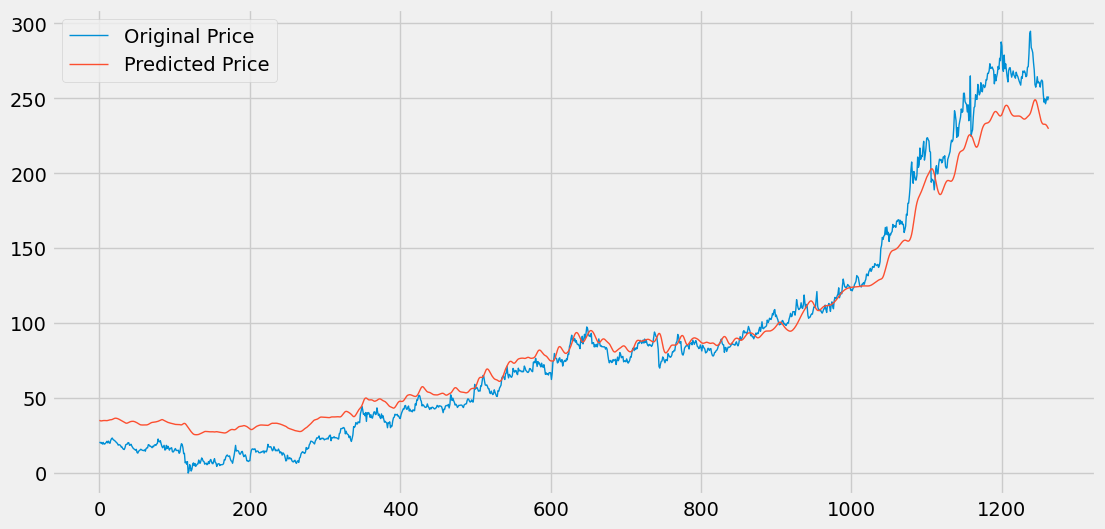

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price',linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [59]:
model.save('stock_dl_model.h5')

In [ ]:
import yfinance as yf
df = yf.download('AAPL', start='2020-01-01', end='2020-12-31')
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []
